# Coder:  Ahsan Javed
# Github:     github.com/ahsan-javed-ds
# LinkedIn:   linkedin.com/in/ahsan-javed17

# Understanding the Dataset related to workplace stress:

In [3]:
!pip install plotly

In [4]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [6]:
# Loading the survey data available publicily and it is related to workplace stress
df = pd.read_csv("survey.csv")

In [7]:
# Checking the first few values of the dataset to get better understandings
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


1. Timestamp
2. Age
3. Gender
4. Country
5. state: the dataset is related to US, so this column consists US states
6. self_employed: if you are self-employed
7. family_history: Family history related to mental illness
8. treatment: the person took treatment for a mental health condition or not
9. work_interfere: if mental illness interferes with the work
10. no_employees: number of employees of the company/organization
11. remote_work: if you work remotely or not
12. tech_company: if a company is tech company/organization or not
13. benefits: if the employer provide mental health benefits or not
14. care_options: the options for mental health care your employer provides
15. wellness_program: if the employer ever discussed mental health as part of an employee wellness program or not
16. seek_help: if the employer provide resources to learn more about mental health issues and how to seek help or not
17. anonymity: Is the anonymity protected if somenone choose to take advantage of mental health or substance abuse treatment 18. resources?
19. leave: medical leave for a mental health condition is easy to avail or not
20. mentalhealthconsequence: if discussing a mental health issue with the employer would have negative consequences or not
21. physhealthconsequence: if discussing a physical health issue with the employer would have negative consequences?
22. coworkers: if one is willing to discuss a mental health issue with the coworkers?
23. physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
24. mentalvsphysical: if one feel that the employer takes mental health as seriously as physical health
25. obs_consequence: if observed negative consequences for coworkers with mental health conditions in the workplace or not
26. comments: Any additional notes or comments

In [8]:
# Checking out the information related to dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Inference from dataset:

As we know, this study is related to the workplace stress regardless of the place a person lives, so dropping out the 'country' and 'state' columns. Also dropping out the columns like 'comments' and 'timestamp' because it not giving any value to the study.

In [9]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

# Data Preparation step:

Checking out the columns 'Age' and 'Gender' if they contain any inconsistent values

In [11]:
print(df['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [12]:
print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


To remove inconsistency from 'Age' and 'Gender' columns, we will do feature engineering and make the values consistent

In [13]:
# Dropping out the values less than zero and greater than 100
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [14]:
# Converting the 'Gender' values into a consistent form

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].unique()

C:\Users\Ahsan-Javed-Laptop\AppData\Local\Temp\ipykernel_17884\2949555551.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',


array(['Female', 'Male', 'Other'], dtype=object)

In [15]:
# Checking out the dataset if it contains any Null values
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               263
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

Hence columns 'self_employed' and 'work_interfere' still contains Null values so we will replace the Null values with some other data

In [16]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [17]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [19]:
# Again checking for NULL-values
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Performing Expolatory Data Analysis:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1254 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             1254 non-null   object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

In [21]:
# To ignore the warnings in the notebook
import warnings 
warnings.filterwarnings('ignore')

In [22]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [23]:
# Checking the values in dataset which will help to better understand the dataset
col_list=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in col_list: 
    print('{}:             {} ' . format(col,df[col].unique()))
    print('--------------------------------------------------------------------------------------')

Age:             [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
--------------------------------------------------------------------------------------
Gender:             ['Female' 'Male' 'Other'] 
--------------------------------------------------------------------------------------
self_employed:             ['No' 'Yes'] 
--------------------------------------------------------------------------------------
family_history:             ['No' 'Yes'] 
--------------------------------------------------------------------------------------
treatment:             ['Yes' 'No'] 
--------------------------------------------------------------------------------------
work_interfere:             ['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
--------------------------------------------------------------------------------------
no_employees:             ['6-25' 'More than 1000' '26-100' '100-

We are taking 'treatment' column becuase it is our target feature

treatment
Yes    633
No     621
Name: count, dtype: int64


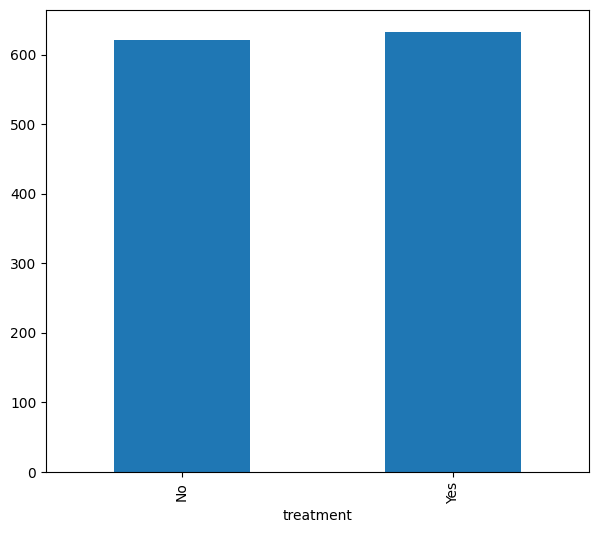

In [24]:
plt.figure(figsize = (7,6))
df.groupby('treatment').size().plot(kind='bar')
print(df['treatment'].value_counts())

Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
50     6
48     6
20     6
51     5
56     4
49     4
57     3
54     3
55     3
60     2
47     2
58     1
62     1
65     1
5      1
53     1
61     1
8      1
11     1
72     1
Name: count, dtype: int64


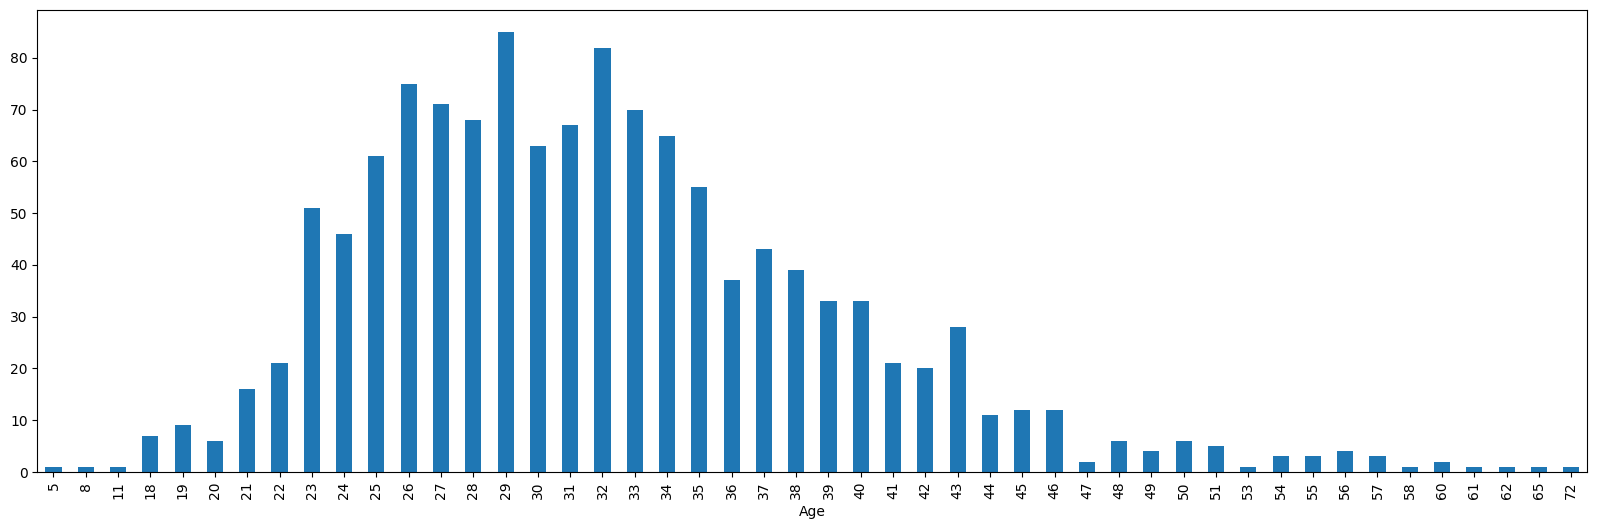

In [25]:
plt.figure(figsize = (20,6))
df.groupby('Age').size().plot(kind='bar')
print(df['Age'].value_counts())

Hence it shows that dataset mostly contains data related to middle-aged workers who are generally falls into the working individuals

Gender
Male      988
Female    247
Other      19
Name: count, dtype: int64


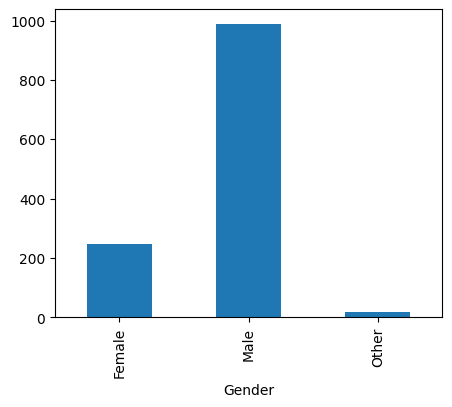

In [26]:
plt.figure(figsize = (5,4))
df.groupby('Gender').size().plot(kind='bar')
print(df['Gender'].value_counts())

By seeing the graph of Gender, it seems like most of the men are working in the tech sector as compared to women

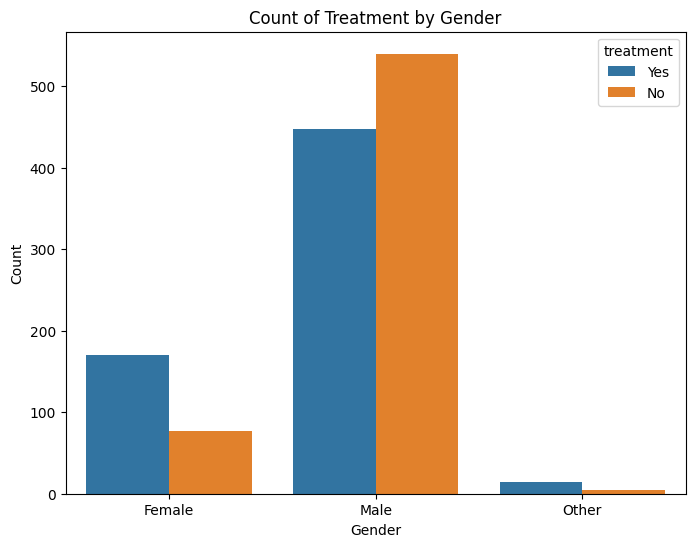

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='treatment')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Treatment by Gender')

# Show the plot
plt.show()

Hence drawing a relationship between the Genders who are actually taking the Treatment. The graph shows that women are most likely to take treatment as compared to men in the tech industry.

self_employed
No     1110
Yes     144
Name: count, dtype: int64


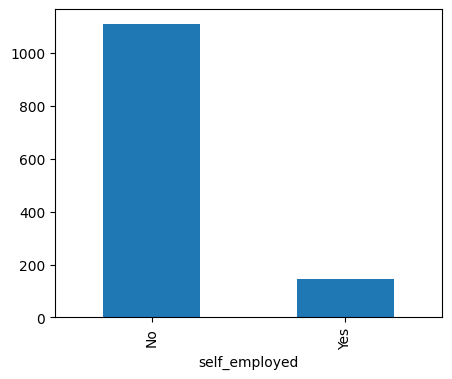

In [33]:
plt.figure(figsize = (5,4))
df.groupby('self_employed').size().plot(kind='bar')
print(df['self_employed'].value_counts())

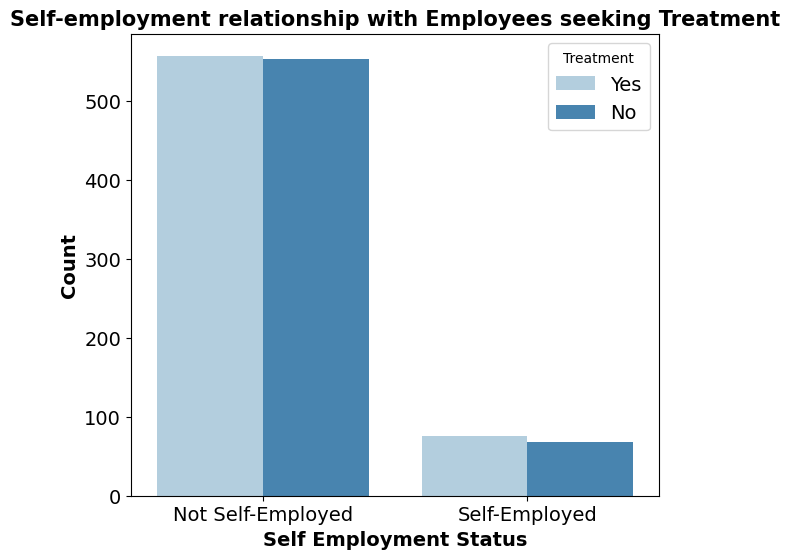

In [38]:
plt.figure(figsize=(15,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette='Blues')

# Add the title and formatting
plt.title('Self-employment relationship with Employees seeking Treatment', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)
plt.xlabel('Self Employment Status', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.gca().set_xticklabels(['Not Self-Employed', 'Self-Employed'])

# Show the plot
plt.show()

Drew a relationship graph between Self-employed (or not) with those who are seeking treatment and we relized that there is no such effects of self-employment data on the individuals who are actually seeking treatments.

family_history
No     764
Yes    490
Name: count, dtype: int64


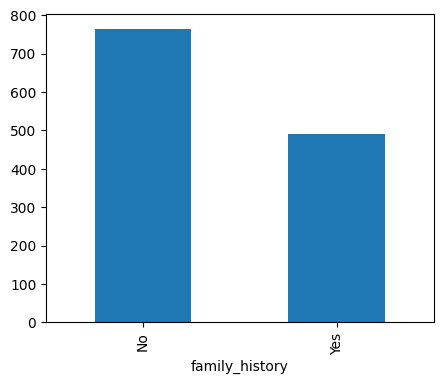

In [39]:
plt.figure(figsize = (5,4))
df.groupby('family_history').size().plot(kind='bar')
print(df['family_history'].value_counts())

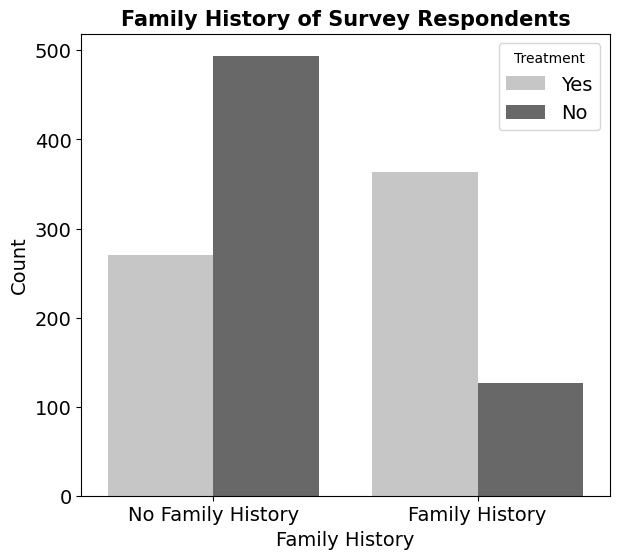

In [40]:
plt.figure(figsize=(15,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='family_history', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Family History of Survey Respondents', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)
plt.xlabel('Family History', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Modify x-axis labels to more descriptive terms, if needed
plt.gca().set_xticklabels(['No Family History', 'Family History'])

# Show the plot
plt.show()


Hence the column which contains the history of the individual's family related to mental health issues shows that those individuals who have any history are most likely to take treatment.

work_interfere
Sometimes     464
Don't know    263
Never         213
Rarely        173
Often         141
Name: count, dtype: int64


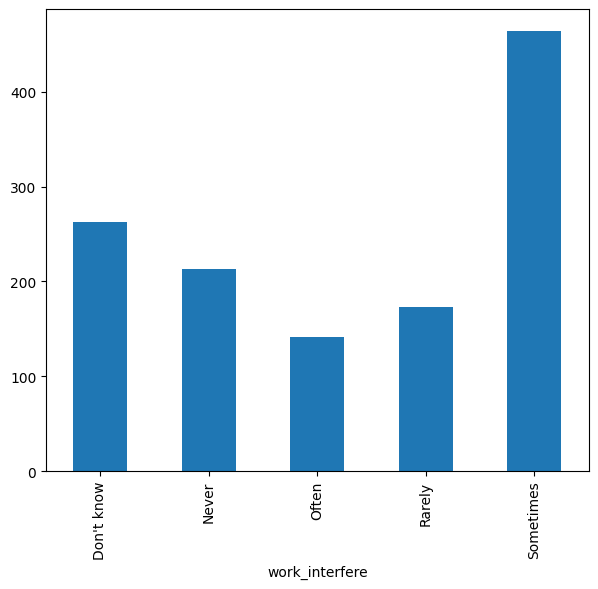

In [41]:
plt.figure(figsize = (7,6))
df.groupby('work_interfere').size().plot(kind='bar')
print(df['work_interfere'].value_counts())

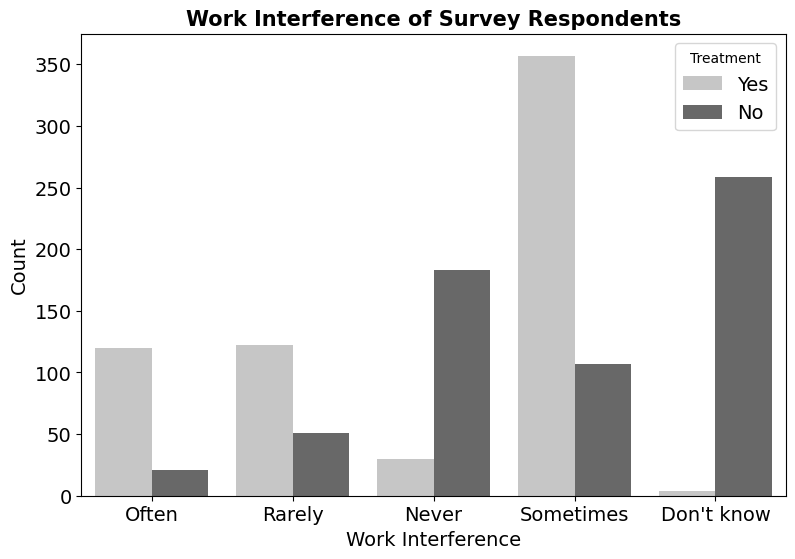

In [43]:
plt.figure(figsize=(20,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='work_interfere', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Work Interference of Survey Respondents', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Treatment', fontsize=14)
plt.xlabel('Work Interference', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


Drawing the relationship between treatment and work interference has generated some interesting results. Those who choosed 'sometimes' in the work interference are more likely to have a mental issue.

On the other hand, people who choosed 'often' are more proactive in seeking treatment for their mental issue before it would become a matter of concern for them at work.

Similarly, for those who choosed 'never' have a little amount of individuals who are actually interested to take treatment.

no_employees
6-25              289
26-100            288
More than 1000    281
100-500           176
1-5               160
500-1000           60
Name: count, dtype: int64


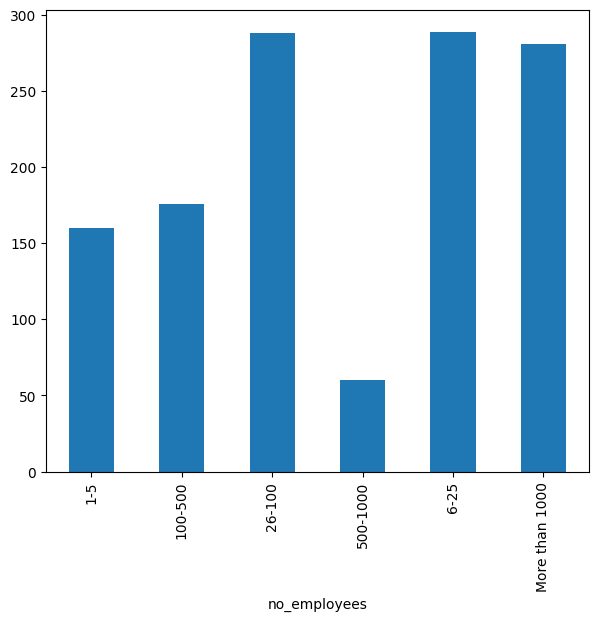

In [44]:
plt.figure(figsize = (7,6))
df.groupby('no_employees').size().plot(kind='bar')
print(df['no_employees'].value_counts())

No     881
Yes    373
Name: remote_work, dtype: int64


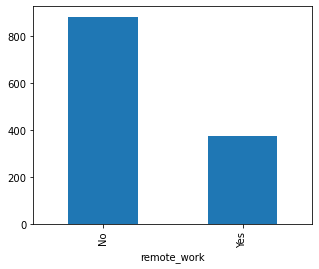

In [30]:
plt.figure(figsize = (5,4))
df.groupby('remote_work').size().plot(kind='bar')
print(df['remote_work'].value_counts())

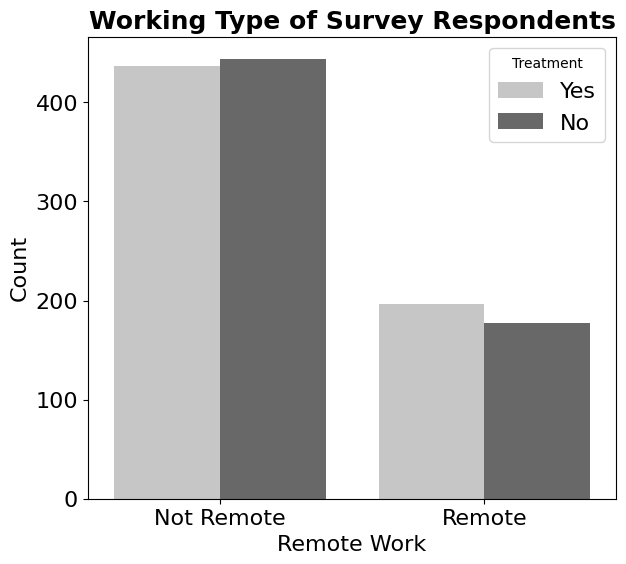

In [45]:
plt.figure(figsize=(15,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='remote_work', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Remote Work', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Modify x-axis labels if needed (e.g., "Yes" and "No" to more descriptive terms)
plt.gca().set_xticklabels(['Not Remote', 'Remote'])

# Show the plot
plt.show()


Column 'remote work' has least effect on the taget variable

benefits
Yes           474
Don't know    408
No            372
Name: count, dtype: int64


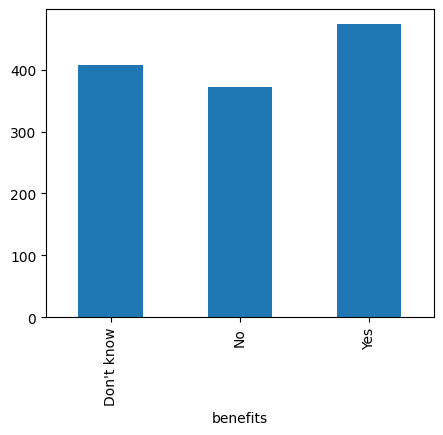

In [46]:
plt.figure(figsize = (5,4))
df.groupby('benefits').size().plot(kind='bar')
print(df['benefits'].value_counts())

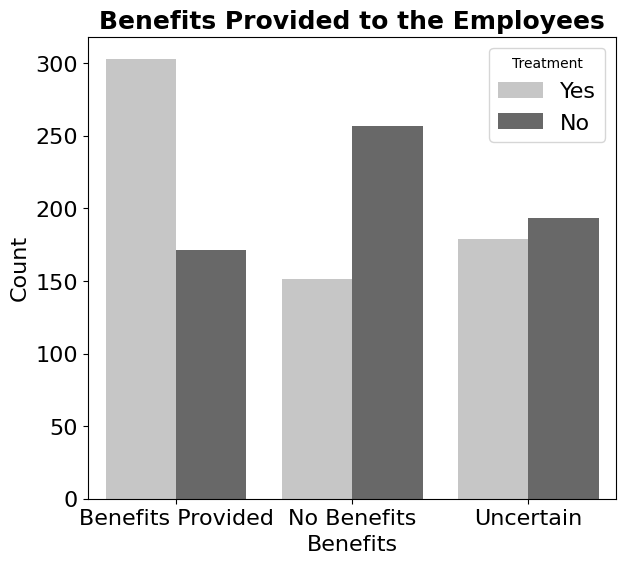

In [48]:
plt.figure(figsize=(15,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='benefits', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Benefits Provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Optionally, modify x-axis labels if you want to make them more descriptive
# Assuming values like "Yes", "No", "Don't know", you can modify accordingly:
plt.gca().set_xticklabels(['Benefits Provided', 'No Benefits', 'Uncertain'])

# Show the plot
plt.show()


Another interesting relationship is between the treatment (target variable) and the variable which shows that the individuals' data related to the mental health benefits they are getting from their employers or not. Even there are individuals who are unaware of this benefits if their employers actually supports them in this issue or not.

And after seeing the graph we can say that those who are aware of the benefits their company providing related to mental health are more likely to take treatment.

Whereas those are actually unaware are not seeking treatment on a considerable extent.

Also, those individuals who are not getting any benefits are not taking any treatment generally.

care_options
No          499
Yes         441
Not sure    314
Name: count, dtype: int64


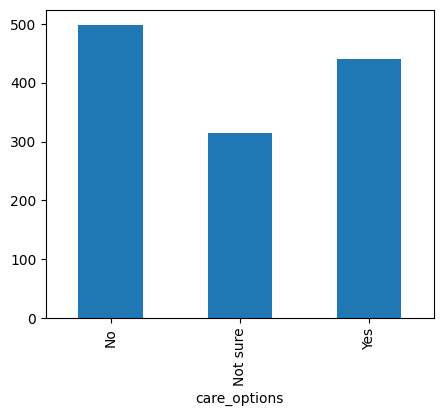

In [49]:
plt.figure(figsize = (5,4))
df.groupby('care_options').size().plot(kind='bar')
print(df['care_options'].value_counts())

The relationship b/w 'Care Option' and 'treatment' are similar to the 'benefits' vs 'treatment' graph

wellness_program
No            839
Yes           228
Don't know    187
Name: count, dtype: int64


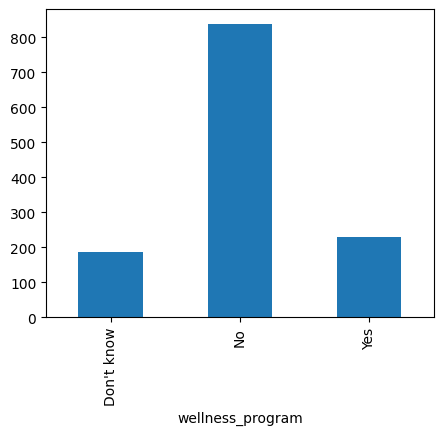

In [50]:
plt.figure(figsize = (5,4))
df.groupby('wellness_program').size().plot(kind='bar')
print(df['wellness_program'].value_counts())

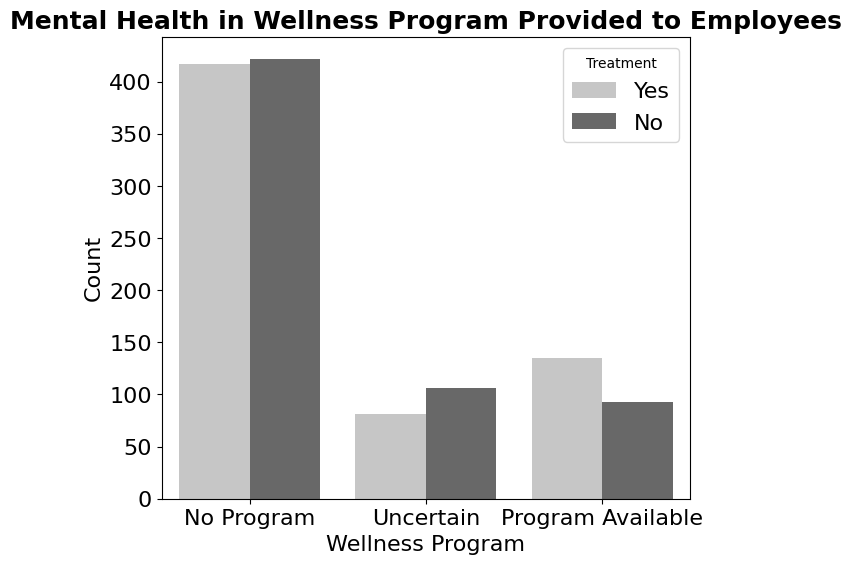

In [51]:
plt.figure(figsize=(15,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='wellness_program', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Mental Health in Wellness Program Provided to Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Wellness Program', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.gca().set_xticklabels(['No Program', 'Uncertain', 'Program Available'])

# Show the plot
plt.show()


seek_help
No            643
Don't know    363
Yes           248
Name: count, dtype: int64


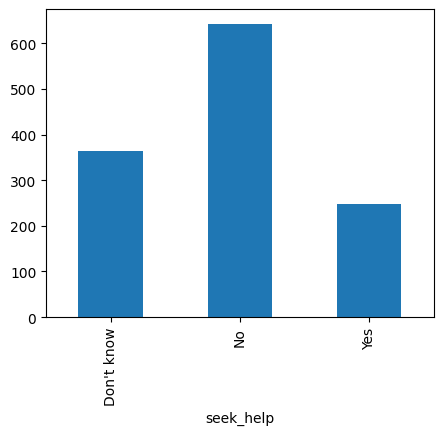

In [52]:
plt.figure(figsize = (5,4))
df.groupby('seek_help').size().plot(kind='bar')
print(df['seek_help'].value_counts())

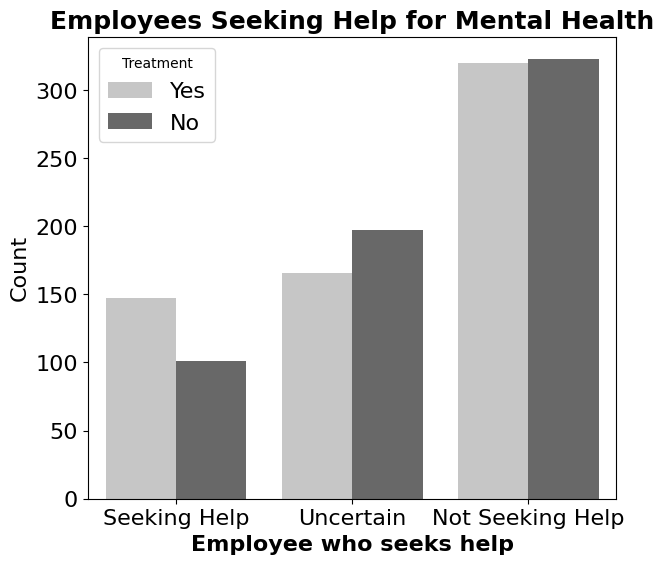

In [54]:
plt.figure(figsize=(15,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='seek_help', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Employees Seeking Help for Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Employee who seeks help', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Modify x-axis labels (assuming the column has "Yes", "No", "Don't know")
plt.gca().set_xticklabels(['Seeking Help', 'Uncertain', 'Not Seeking Help'])

# Show the plot
plt.show()


anonymity
Don't know    816
Yes           374
No             64
Name: count, dtype: int64


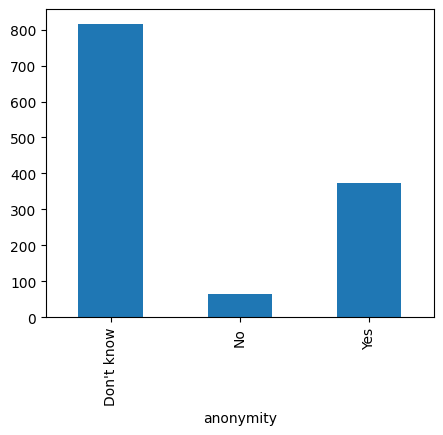

In [55]:
plt.figure(figsize = (5,4))
df.groupby('anonymity').size().plot(kind='bar')
print(df['anonymity'].value_counts())

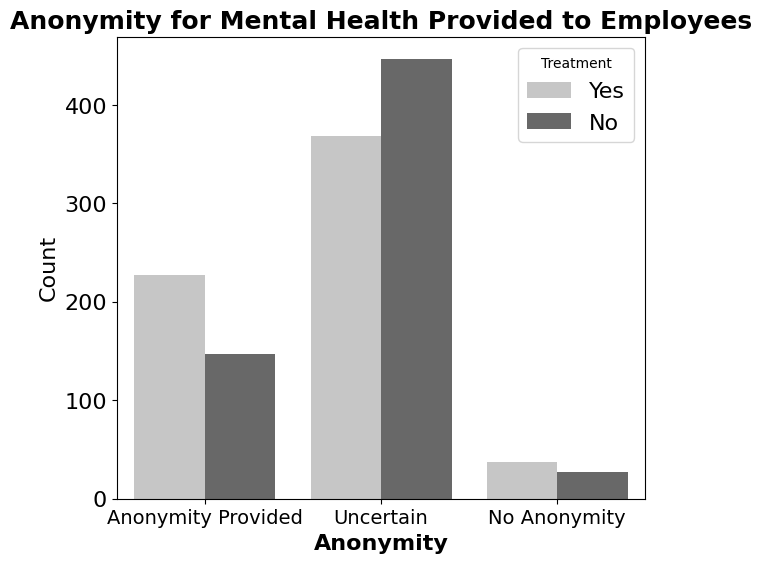

In [57]:
plt.figure(figsize=(15,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='anonymity', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Anonymity for Mental Health Provided to Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Anonymity', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Modify x-axis labels (assuming the column has "Yes", "No", "Don't know")
plt.gca().set_xticklabels([ 'Anonymity Provided', 'Uncertain', 'No Anonymity'])

# Show the plot
plt.show()


leave
Don't know            561
Somewhat easy         266
Very easy             205
Somewhat difficult    125
Very difficult         97
Name: count, dtype: int64


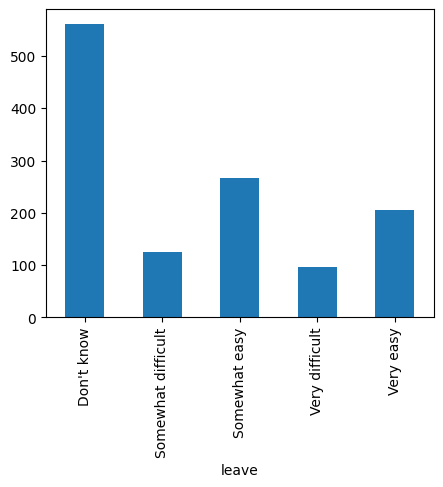

In [58]:
plt.figure(figsize = (5,4))
df.groupby('leave').size().plot(kind='bar')
print(df['leave'].value_counts())

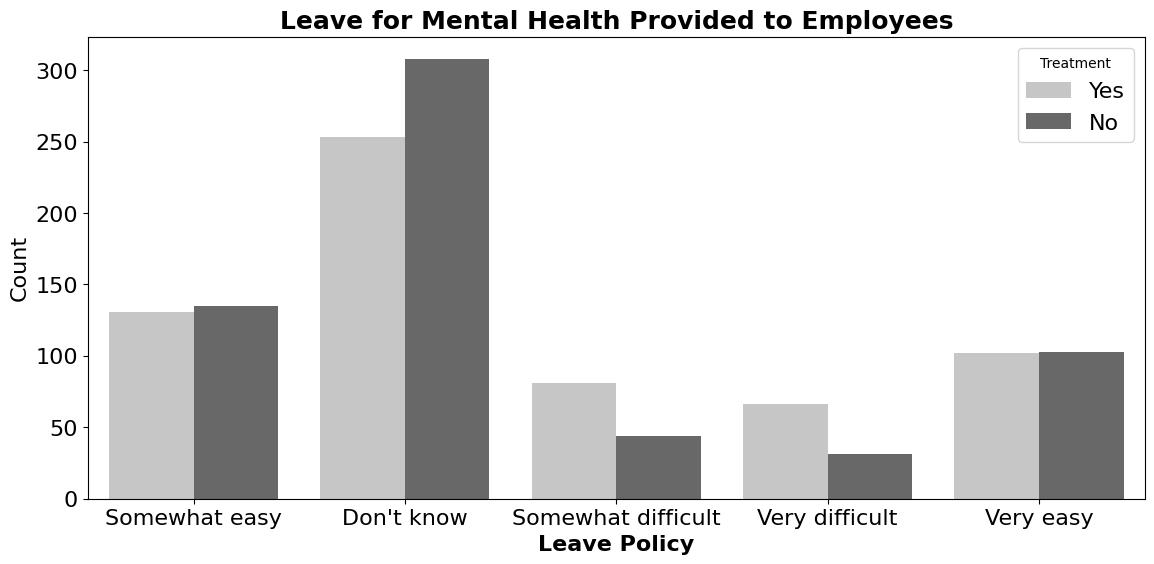

In [60]:
plt.figure(figsize=(30,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='leave', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Leave for Mental Health Provided to Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Leave Policy', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()


mental_health_consequence
No       489
Maybe    476
Yes      289
Name: count, dtype: int64


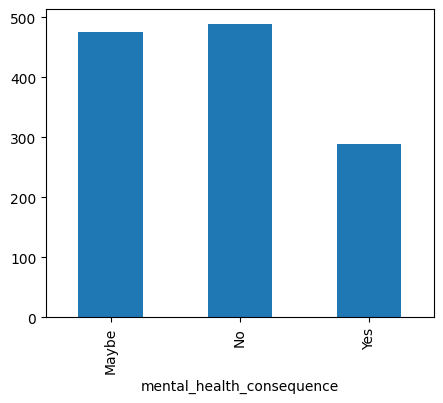

In [61]:
plt.figure(figsize = (5,4))
df.groupby('mental_health_consequence').size().plot(kind='bar')
print(df['mental_health_consequence'].value_counts())

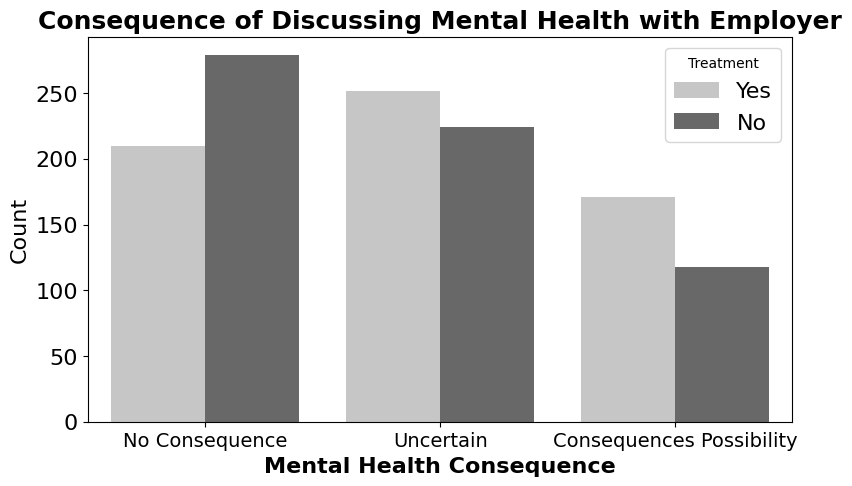

In [68]:
plt.figure(figsize=(20,5))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='mental_health_consequence', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Consequence of Discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Mental Health Consequence', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Modify x-axis labels (assuming values like "No Consequence", "Minor Consequence", etc.)
plt.gca().set_xticklabels(['No Consequence', 'Uncertain', 'Consequences Possibility'])

# Show the plot
plt.show()


phys_health_consequence
No       922
Maybe    273
Yes       59
Name: count, dtype: int64


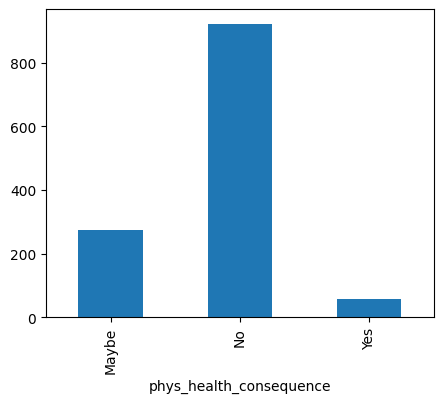

In [70]:
plt.figure(figsize = (5,4))
df.groupby('phys_health_consequence').size().plot(kind='bar')
print(df['phys_health_consequence'].value_counts())

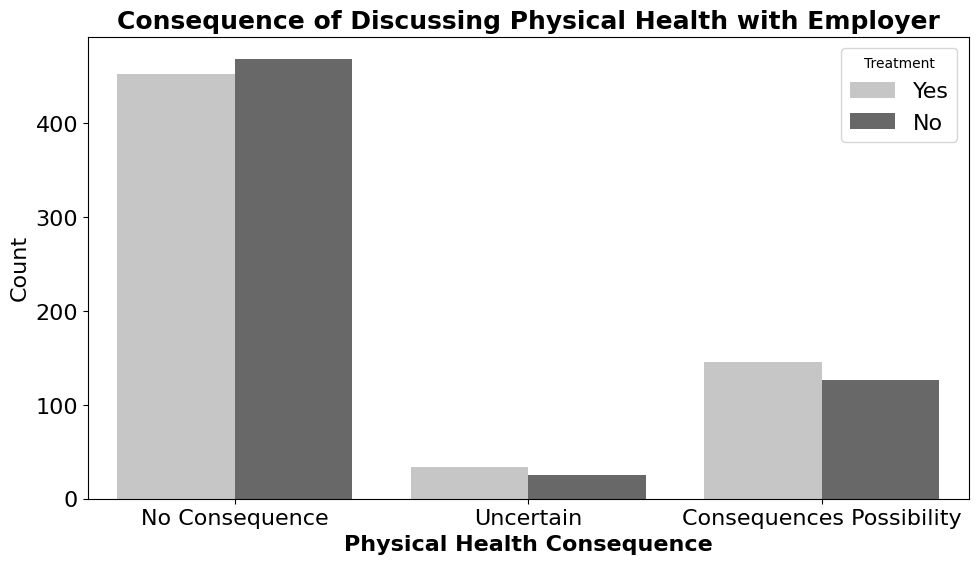

In [72]:
plt.figure(figsize=(25,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='phys_health_consequence', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Consequence of Discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Physical Health Consequence', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Modify x-axis labels (assuming values like "No Consequence", "Minor Consequence", etc.)
plt.gca().set_xticklabels(['No Consequence', 'Uncertain', 'Consequences Possibility'])

# Show the plot
plt.show()


Some of them    772
No              258
Yes             224
Name: coworkers, dtype: int64


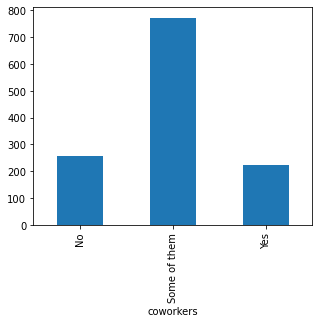

In [47]:
plt.figure(figsize = (5,4))
df.groupby('coworkers').size().plot(kind='bar')
print(df['coworkers'].value_counts())

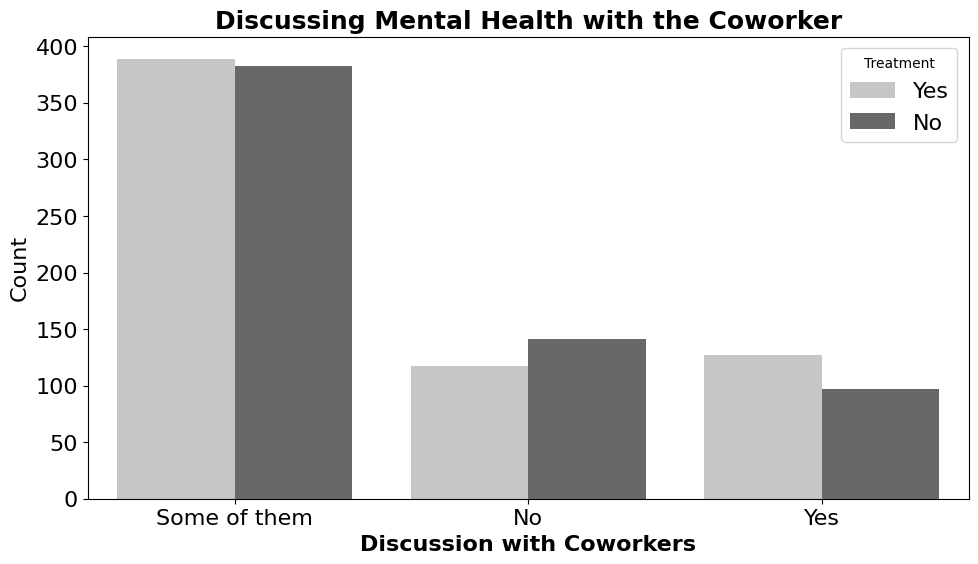

In [81]:
plt.figure(figsize=(25,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='coworkers', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Discussing Mental Health with the Coworker', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Discussion with Coworkers', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()


supervisor
Yes             514
No              390
Some of them    350
Name: count, dtype: int64


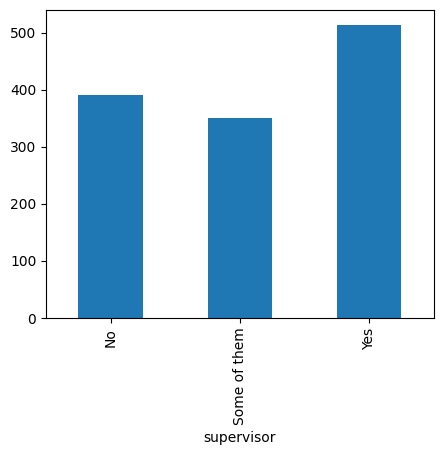

In [75]:
plt.figure(figsize = (5,4))
df.groupby('supervisor').size().plot(kind='bar')
print(df['supervisor'].value_counts())

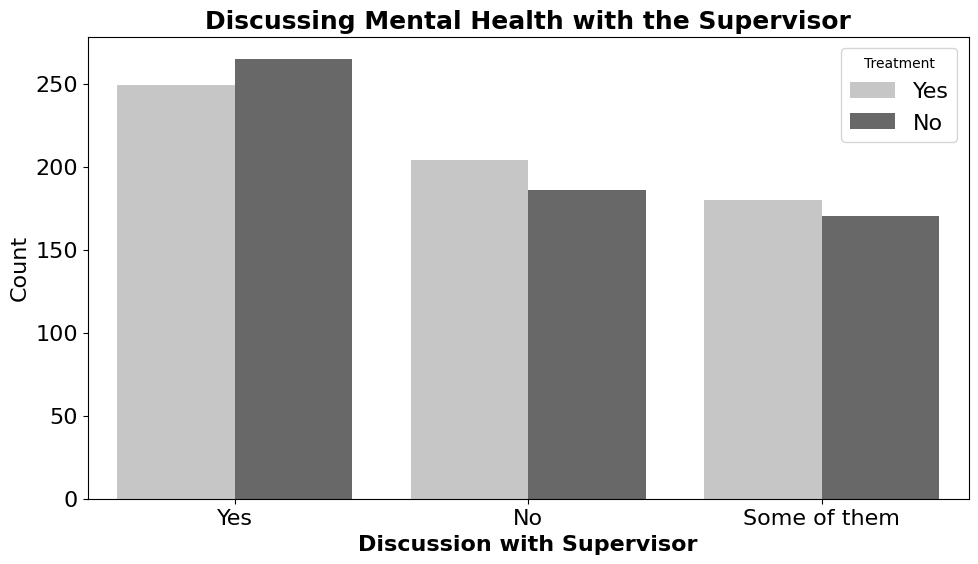

In [79]:
plt.figure(figsize=(25,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='supervisor', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Discussion with Supervisor', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()

mental_health_interview
No       1005
Maybe     207
Yes        42
Name: count, dtype: int64


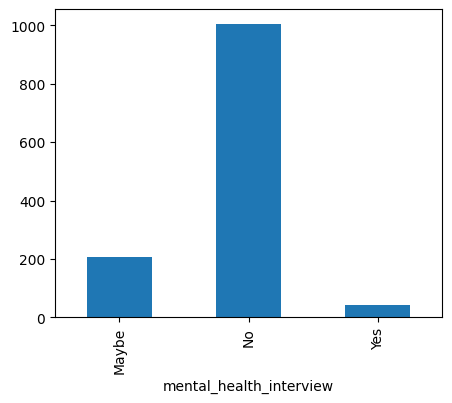

In [78]:
plt.figure(figsize = (5,4))
df.groupby('mental_health_interview').size().plot(kind='bar')
print(df['mental_health_interview'].value_counts())

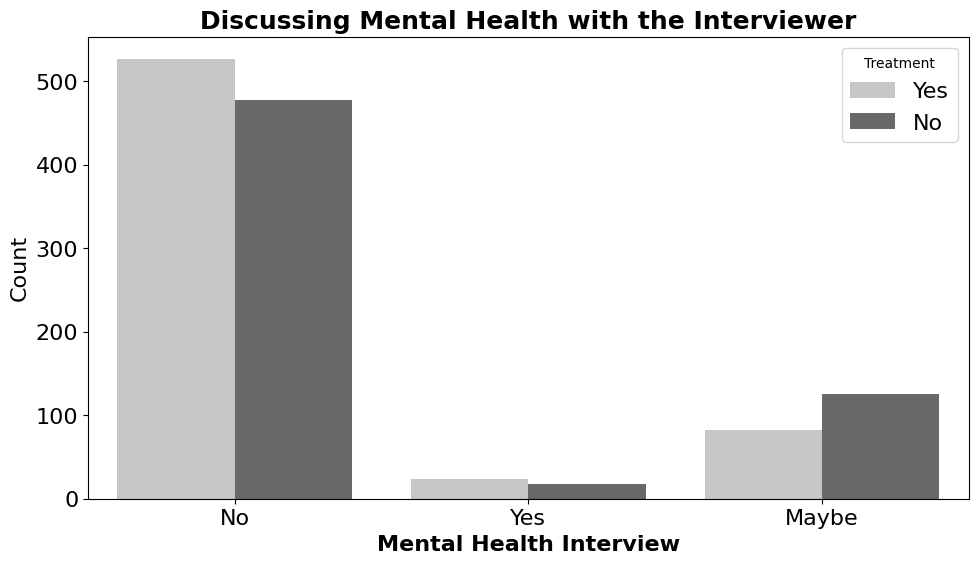

In [82]:
plt.figure(figsize=(25,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='mental_health_interview', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Mental Health Interview', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()

phys_health_interview
Maybe    556
No       497
Yes      201
Name: count, dtype: int64


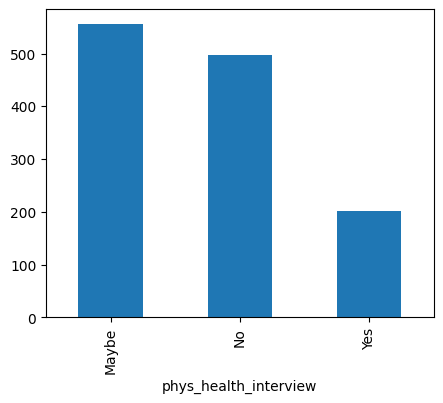

In [83]:
plt.figure(figsize = (5,4))
df.groupby('phys_health_interview').size().plot(kind='bar')
print(df['phys_health_interview'].value_counts())

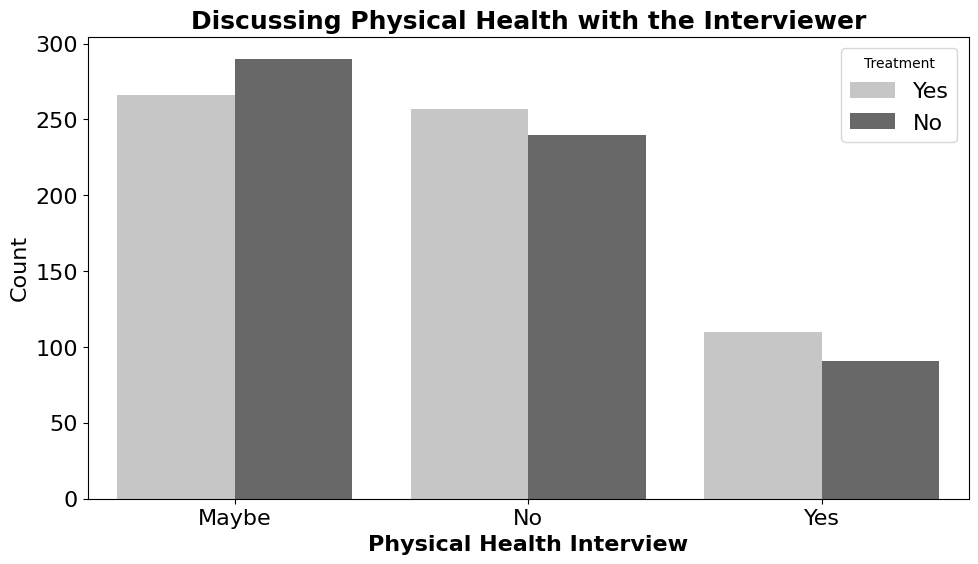

In [84]:
plt.figure(figsize=(25,6))

# Create the subplot for the countplot
plt.subplot(1,2,2)
sns.countplot(x='phys_health_interview', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('Physical Health Interview', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()

mental_vs_physical
Don't know    574
Yes           342
No            338
Name: count, dtype: int64


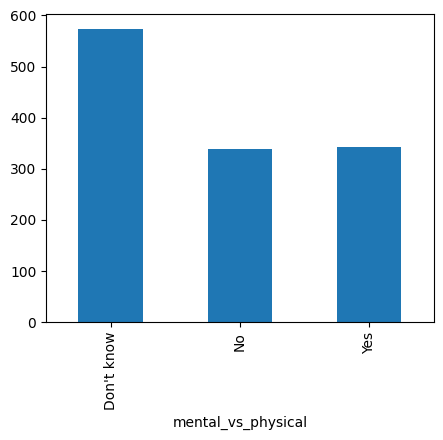

In [85]:
plt.figure(figsize = (5,4))
df.groupby('mental_vs_physical').size().plot(kind='bar')
print(df['mental_vs_physical'].value_counts())

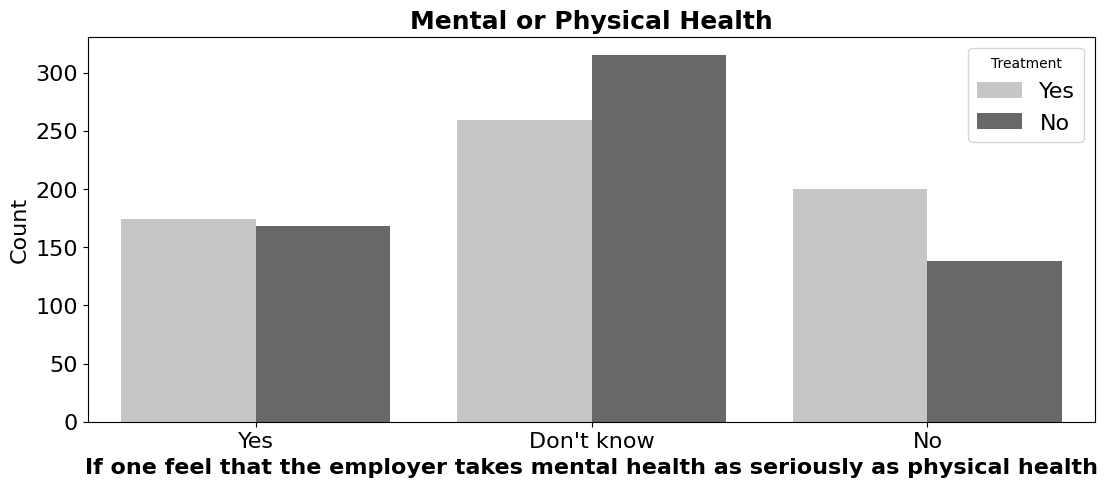

In [87]:
plt.figure(figsize=(13,5))

# Create the countplot
sns.countplot(x='mental_vs_physical', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('If one feel that the employer takes mental health as seriously as physical health', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()


obs_consequence
No     1072
Yes     182
Name: count, dtype: int64


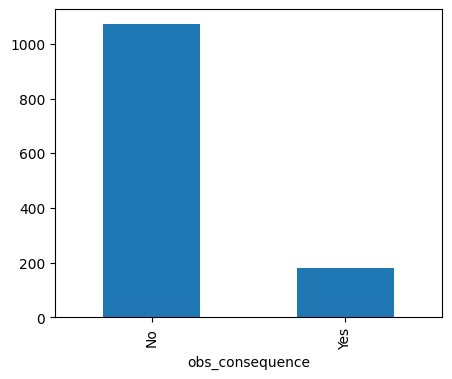

In [88]:
plt.figure(figsize = (5,4))
df.groupby('obs_consequence').size().plot(kind='bar')
print(df['obs_consequence'].value_counts())

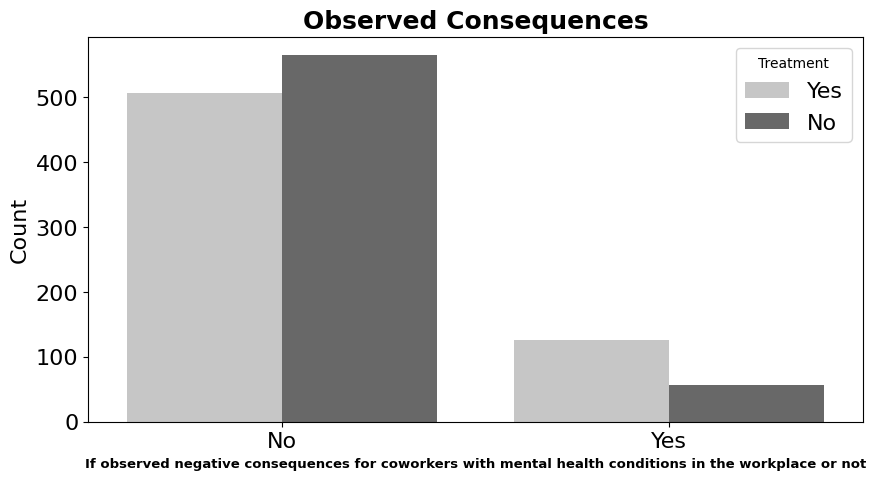

In [95]:
plt.figure(figsize=(10,5))

# Create the countplot
sns.countplot(x='obs_consequence', hue='treatment', data=df, palette='Greys')

# Add the title and formatting
plt.title('Observed Consequences', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)
plt.xlabel('If observed negative consequences for coworkers with mental health conditions in the workplace or not', fontsize=9.5, fontweight='bold')
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()

In [96]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

# Data Preparation for ML Algorithms:

It has been noticed that the dataset contains categorical values, so we need to encode them before applying any algorithm

In [97]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [98]:
df['treatment'].value_counts()

treatment
1    633
0    621
Name: count, dtype: int64

We checked the target column 'treatment' and relized that the values are balance and there is no need for undersampling or oversampling

<Axes: >

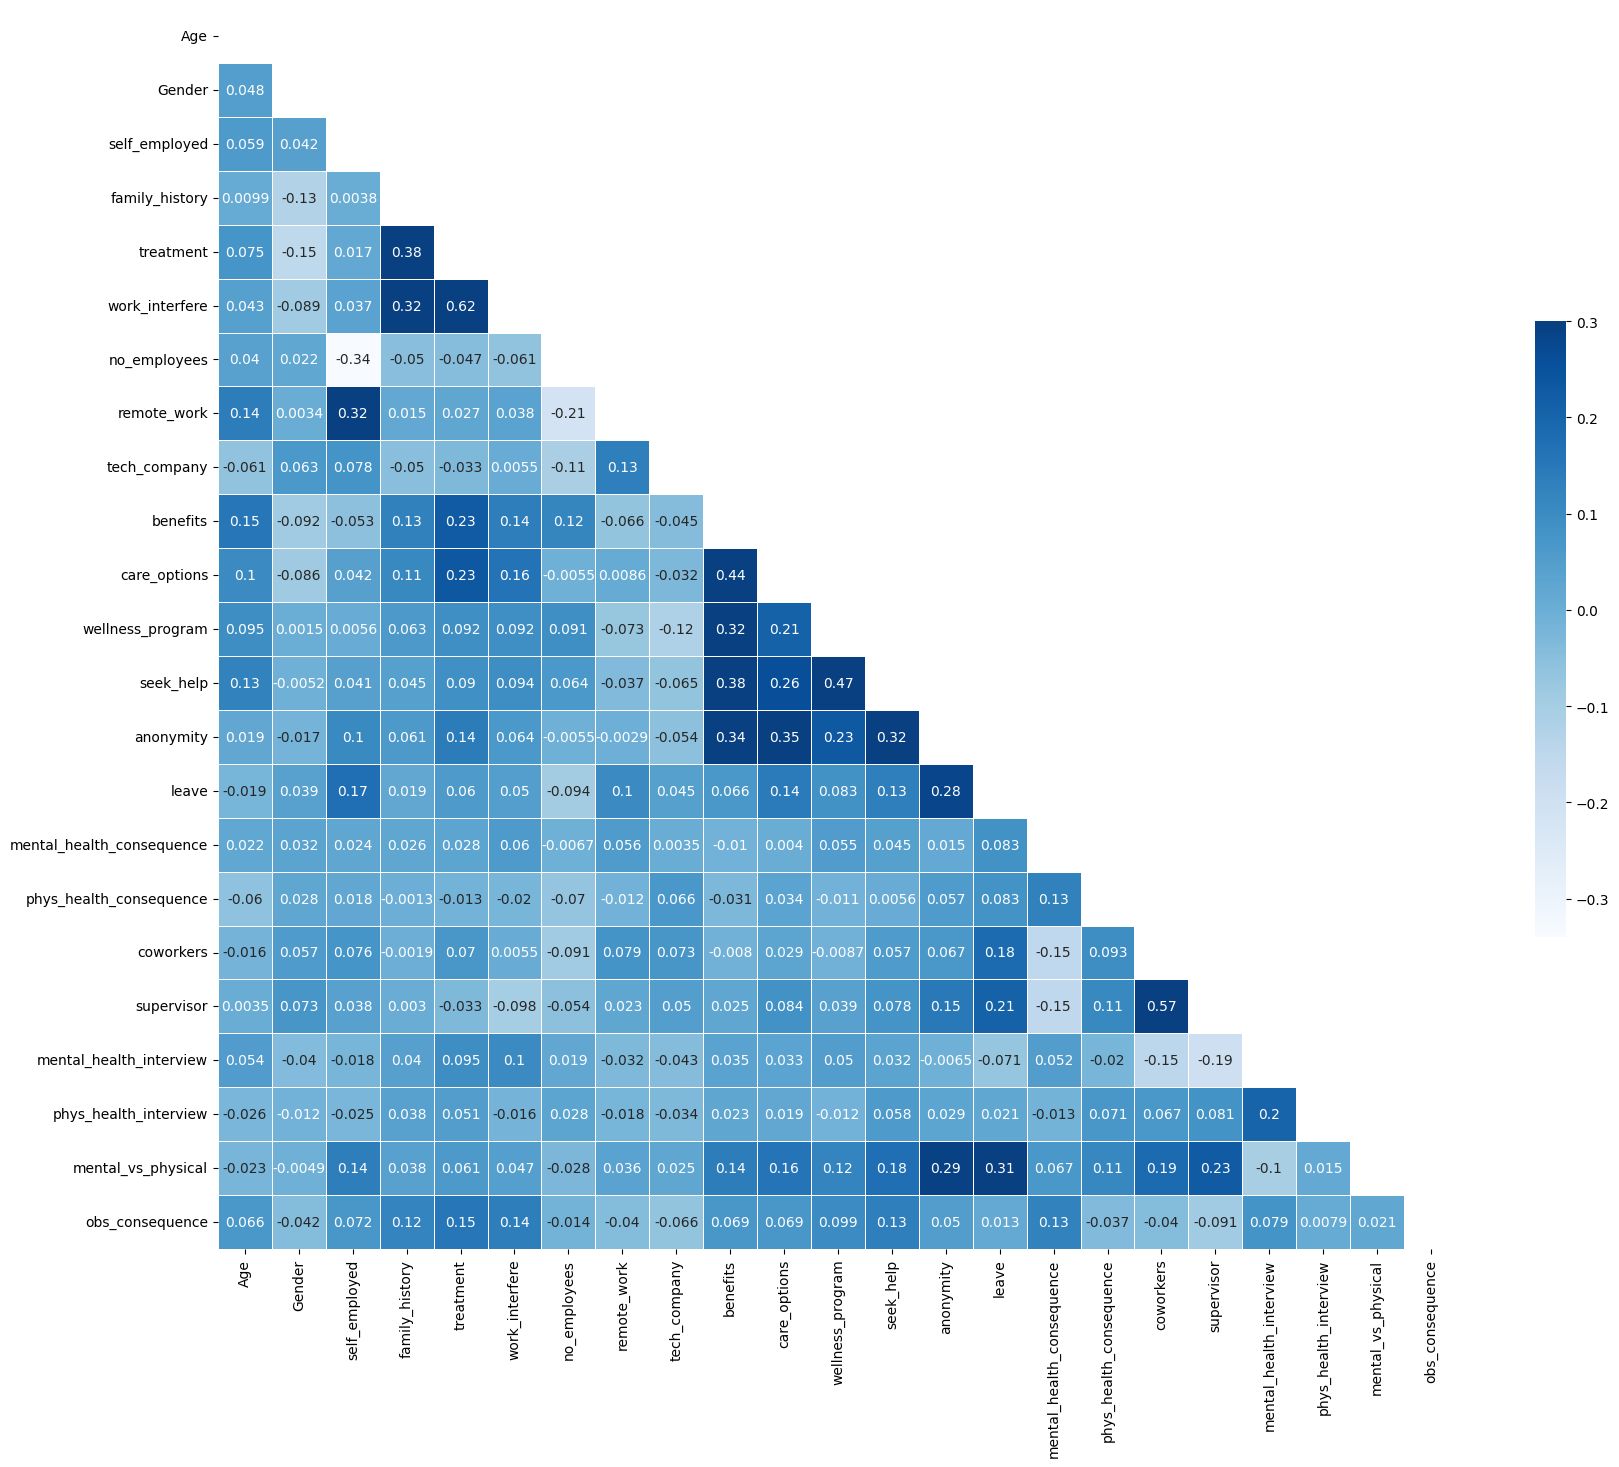

In [99]:
# Drawing the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4}, annot = True)

#  - - - -  Machine Learning Algorithms Evaluation: - - - - 

In [103]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 480.1 kB/s eta 0:04:20
   ---------------------------------------- 0.8/124.9 MB 569.3 kB/s eta 0:03:39
   ---------------------------------------- 0.8/124.9 MB 569.3 kB/s eta 0:03:39
   ---------------------------------------- 0.8/124.9 MB 569.3 kB/s eta 0:03:39
   ---------------------------------------- 1.0/124.9 MB 565.8 kB/s eta 0:03:39
   ---------------------------------------- 1.0/124.9 MB 565.8 kB/s eta 0:03:39
   ---------------------------------------- 1.3/124.9 MB 573.6 kB/s eta 0:03:36
   ---------------------------------------- 1.3/124.9 MB 573.6 kB/s eta 0:03:36
    -

In [104]:
# Importing all the ML models we will be evaluating in this project

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, RocCurveDisplay, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn import metrics

In [105]:
# Splitting the dataset into Training and Testing dataset

from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

# Logistic Regression:

In [106]:
model_1 = LogisticRegression()

In [107]:
model_1.fit(X_train,y_train)
predict1 = model_1.predict(X_test)
acc_lg = accuracy_score(y_test, predict1)
print('Logistic Regression: ',acc_lg)

Logistic Regression:  0.8037135278514589


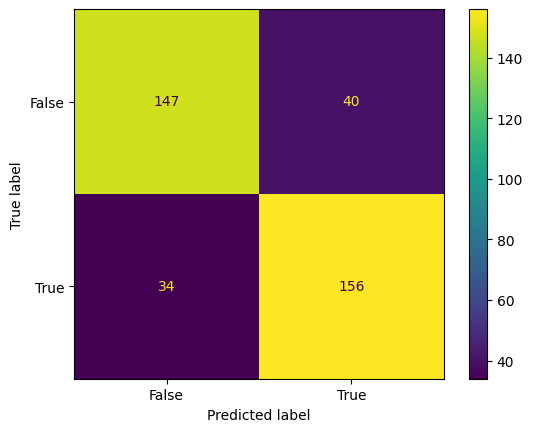

<Figure size 1000x1000 with 0 Axes>

In [108]:
# Confusion Matrix for Logistic Regression

confusion_matrix = metrics.confusion_matrix(y_test, predict1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [109]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# precision tp / (tp + fp)
precision1 = precision_score(y_test, predict1)
print('Precision: %f' % precision1)
# recall: tp / (tp + fn)
recall1 = recall_score(y_test, predict1)
print('Recall: %f' % recall1)
# f1: 2 tp / (2 tp + fp + fn)
f1_1 = f1_score(y_test, predict1)
print('F1 score: %f' % f1_1)

Precision: 0.795918
Recall: 0.821053
F1 score: 0.808290


# KNeighborsClassifier:

In [110]:
model_2 = KNeighborsClassifier(n_neighbors = 3, weights ='uniform')

In [112]:
model_2.fit(X_train,y_train)
predict2 = model_2.predict(X_test)
acc_kc = accuracy_score(y_test, predict2)
print('KNeighborsClassifier: ',acc_kc)

KNeighborsClassifier:  0.7347480106100795


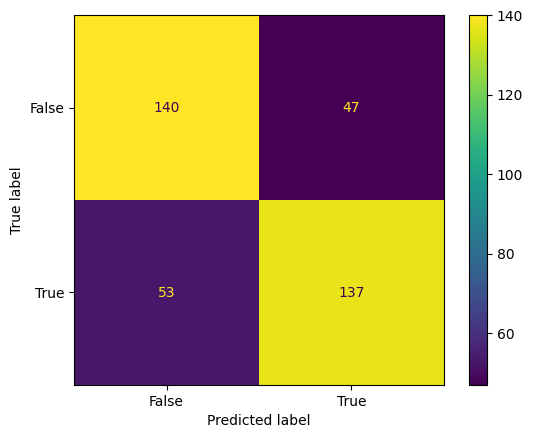

<Figure size 1000x1000 with 0 Axes>

In [113]:
# Confusion Matrix for KNeighborsClassifier

confusion_matrix = metrics.confusion_matrix(y_test, predict2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [114]:
# precision tp / (tp + fp)
precision2 = precision_score(y_test, predict2)
print('Precision: %f' % precision2)
# recall: tp / (tp + fn)
recall2 = recall_score(y_test, predict2)
print('Recall: %f' % recall2)
# f1: 2 tp / (2 tp + fp + fn)
f1_2 = f1_score(y_test, predict2)
print('F1 score: %f' % f1_2)

Precision: 0.744565
Recall: 0.721053
F1 score: 0.732620


# Decision Tree:

In [115]:
model_3 = DecisionTreeClassifier(random_state=10)

In [116]:
model_3.fit(X_train,y_train)
predict3 = model_3.predict(X_test)
acc_dt = accuracy_score(y_test, predict3)
print('Decision Tree: ',acc_dt)

Decision Tree:  0.7214854111405835


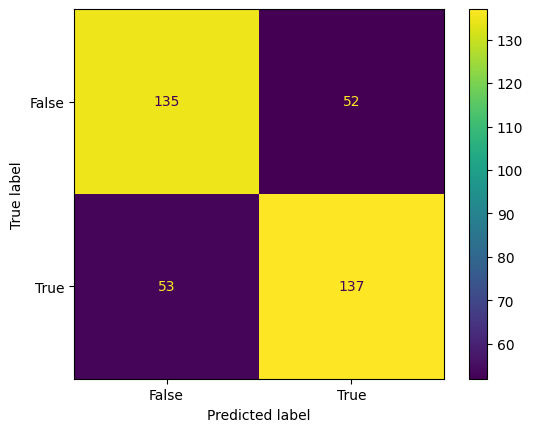

<Figure size 1000x1000 with 0 Axes>

In [117]:
# Confusion Matrix for Decision Tree:

confusion_matrix = metrics.confusion_matrix(y_test, predict3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [118]:
# precision tp / (tp + fp)
precision3 = precision_score(y_test, predict3)
print('Precision: %f' % precision3)
# recall: tp / (tp + fn)
recall3 = recall_score(y_test, predict3)
print('Recall: %f' % recall2)
# f1: 2 tp / (2 tp + fp + fn)
f1_3 = f1_score(y_test, predict3)
print('F1 score: %f' % f1_3)

Precision: 0.724868
Recall: 0.721053
F1 score: 0.722955


# Random Forest:

In [119]:
model_4 = RandomForestClassifier(n_estimators=70, random_state=0)

In [120]:
model_4.fit(X_train,y_train)
predict4 = model_4.predict(X_test)
acc_rf = accuracy_score(y_test, predict4)
print('Random Forest: ',acc_rf)

Random Forest:  0.7851458885941645


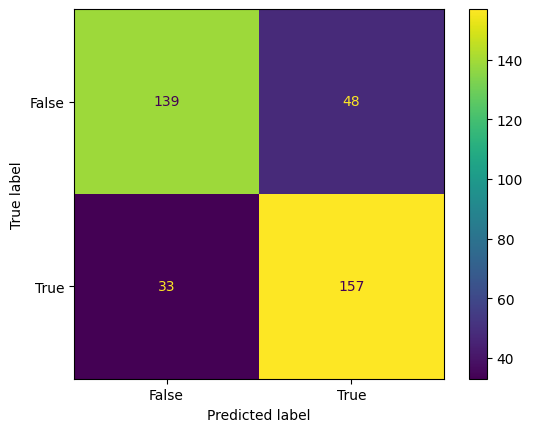

<Figure size 1000x1000 with 0 Axes>

In [121]:
# Confusion Matrix for Random Forest:

confusion_matrix = metrics.confusion_matrix(y_test, predict4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [122]:
# precision tp / (tp + fp)
precision4 = precision_score(y_test, predict4)
print('Precision: %f' % precision4)
# recall: tp / (tp + fn)
recall4 = recall_score(y_test, predict4)
print('Recall: %f' % recall4)
# f1: 2 tp / (2 tp + fp + fn)
f1_4 = f1_score(y_test, predict4)
print('F1 score: %f' % f1_4)

Precision: 0.765854
Recall: 0.826316
F1 score: 0.794937


# Gradient Boosting Classifier

In [123]:
model_5 = GradientBoostingClassifier(random_state=20)

In [124]:
model_5.fit(X_train,y_train)
predict5 = model_5.predict(X_test)
acc_gb = accuracy_score(y_test, predict5)
print('Gradient Boosting Classifier: ',acc_gb)

Gradient Boosting Classifier:  0.8116710875331565


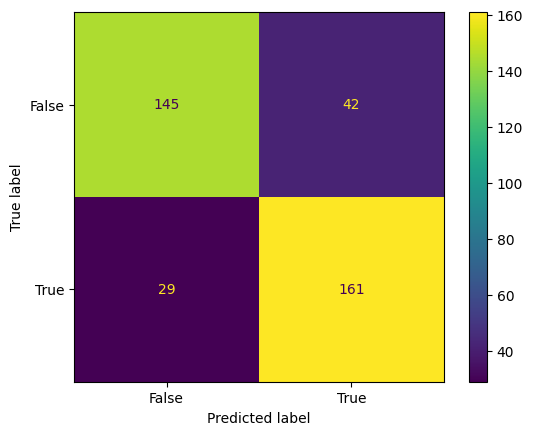

<Figure size 1000x1000 with 0 Axes>

In [125]:
# Confusion Matrix for Gradient Boosting Classifier:

confusion_matrix = metrics.confusion_matrix(y_test, predict5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [126]:
# precision tp / (tp + fp)
precision5 = precision_score(y_test, predict5)
print('Precision: %f' % precision5)
# recall: tp / (tp + fn)
recall5 = recall_score(y_test, predict5)
print('Recall: %f' % recall5)
# f1: 2 tp / (2 tp + fp + fn)
f1_5 = f1_score(y_test, predict5)
print('F1 score: %f' % f1_5)

Precision: 0.793103
Recall: 0.847368
F1 score: 0.819338


# Adaboost Classifier:

In [127]:
model_6 = AdaBoostClassifier()

In [128]:
model_6.fit(X_train,y_train)
predict6 = model_6.predict(X_test)
acc_ad = accuracy_score(y_test, predict6)
print('Adaboost Classifier: ',acc_ad)

Adaboost Classifier:  0.8010610079575596


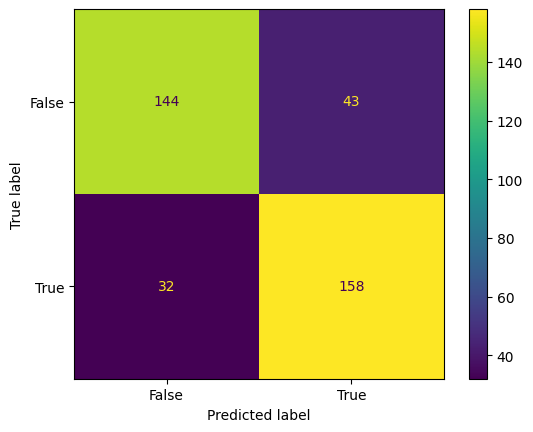

<Figure size 1000x1000 with 0 Axes>

In [129]:
# Confusion Matrix for Adaboost Classifier::

confusion_matrix = metrics.confusion_matrix(y_test, predict6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [130]:
# precision tp / (tp + fp)
precision6 = precision_score(y_test, predict6)
print('Precision: %f' % precision6)
# recall: tp / (tp + fn)
recall6 = recall_score(y_test, predict6)
print('Recall: %f' % recall6)
# f1: 2 tp / (2 tp + fp + fn)
f1_6 = f1_score(y_test, predict6)
print('F1 score: %f' % f1_6)

Precision: 0.786070
Recall: 0.831579
F1 score: 0.808184


# XGB Classifier:

In [131]:
model_7 = xgb.XGBClassifier(random_state=0,booster="gbtree")

In [132]:
model_7.fit(X_train,y_train)
predict7 = model_7.predict(X_test)
acc_xgb = accuracy_score(y_test, predict7)
print('XGB Classifier: ',acc_xgb)

XGB Classifier:  0.7931034482758621


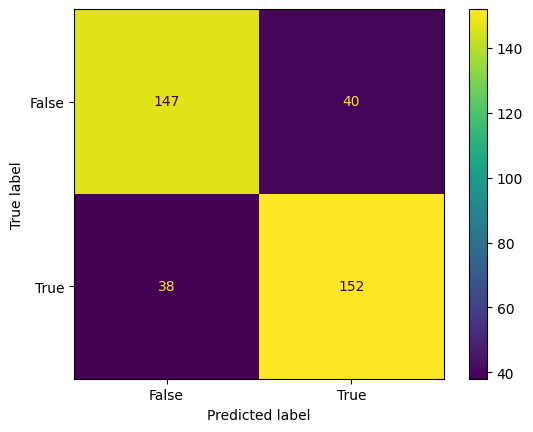

<Figure size 1000x1000 with 0 Axes>

In [133]:
# Confusion Matrix for XGB Classifier:

confusion_matrix = metrics.confusion_matrix(y_test, predict7)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.figure(figsize=(10,10))
plt.show()

In [134]:
# precision tp / (tp + fp)
precision7 = precision_score(y_test, predict7)
print('Precision: %f' % precision7)
# recall: tp / (tp + fn)
recall7 = recall_score(y_test, predict7)
print('Recall: %f' % recall7)
# f1: 2 tp / (2 tp + fp + fn)
f1_7 = f1_score(y_test, predict7)
print('F1 score: %f' % f1_7)

Precision: 0.791667
Recall: 0.800000
F1 score: 0.795812


# SVM:

In [135]:
model_8 = SVC(kernel='rbf', random_state = 1)

In [136]:
model_8.fit(X_train,y_train)
predict8 = model_8.predict(X_test)
acc_svm = accuracy_score(y_test, predict8)
print('SVM: ',acc_svm)

SVM:  0.7904509283819628


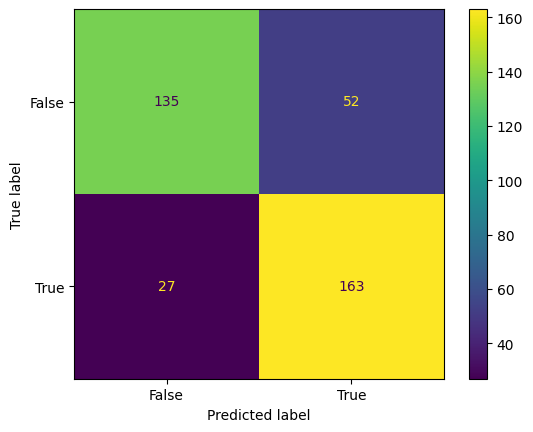

In [137]:
# Confusion Matrix for SVM:

confusion_matrix = metrics.confusion_matrix(y_test, predict8)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [138]:
# precision tp / (tp + fp)
precision8 = precision_score(y_test, predict8)
print('Precision: %f' % precision8)
# recall: tp / (tp + fn)
recall8 = recall_score(y_test, predict8)
print('Recall: %f' % recall8)
# f1: 2 tp / (2 tp + fp + fn)
f1_8 = f1_score(y_test, predict8)
print('F1 score: %f' % f1_8)

Precision: 0.758140
Recall: 0.857895
F1 score: 0.804938


# Ensemble Learning Methods:

In [139]:
# Averaging Method:

avg_method = (predict1 + predict2 + predict3 + predict4 + predict5 + predict6 + predict7 + predict8)/8.0
print(mean_squared_error(y_test, avg_method))

0.14800232095490717


In [140]:
# Max Voting:
from sklearn.ensemble import VotingClassifier
max_vote = VotingClassifier(estimators=[('lr', model_1), ('kn', model_2), ('dt', model_3), ('rf', model_4), ('gb', model_5), ('ada', model_6), ('xgb', model_7), ('svm', model_8)], voting='hard')

In [141]:
max_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('kn', KNeighborsClassifier(n_neighbors=3)),
                             ('dt', DecisionTreeClassifier(random_state=10)),
                             ('rf',
                              RandomForestClassifier(n_estimators=70,
                                                     random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(random_state=20)),
                             ('ada', AdaBoostClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbac...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...)),
                             ('svm', SVC(random_state=1))])

In [142]:
max_vote_final = max_vote.predict(X_test)

In [143]:
from sklearn.metrics import log_loss
print(log_loss(y_test, max_vote_final))
print(accuracy_score(y_test, max_vote_final))

6.692455536440852
0.8143236074270557


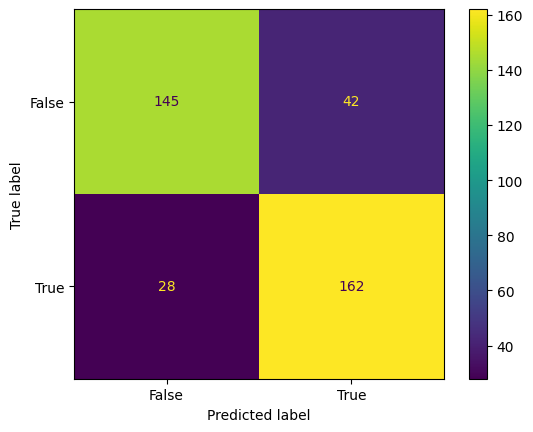

In [144]:
# Confusion Matrix for Ensemble Learning:

confusion_matrix = metrics.confusion_matrix(y_test, max_vote_final)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [145]:
# precision tp / (tp + fp)
precision9 = precision_score(y_test, max_vote_final)
print('Precision: %f' % precision9)
# recall: tp / (tp + fn)
recall9 = recall_score(y_test, max_vote_final)
print('Recall: %f' % recall9)
# f1: 2 tp / (2 tp + fp + fn)
f1_9 = f1_score(y_test, max_vote_final)
print('F1 score: %f' % f1_9)

Precision: 0.794118
Recall: 0.852632
F1 score: 0.822335


# Linear Regression:

In [146]:
model_9 = LinearRegression()

In [147]:
model_9.fit(X_train,y_train)

LinearRegression()

In [148]:
print(model_9.intercept_)

-0.07052604564929532


In [149]:
predictions = model_9.predict(X_test)
predictions

array([ 9.63772594e-01,  5.24348155e-01,  4.95937409e-02,  1.03273259e+00,
        9.51814117e-01,  3.01470227e-02,  5.01110207e-01,  2.93710706e-01,
        5.19420244e-01,  1.04717338e+00,  9.53316462e-01,  5.91715955e-02,
        5.44503038e-02,  6.54531808e-02,  2.08886904e-01,  7.80596507e-01,
        6.41755521e-02,  8.85354015e-01,  4.09819073e-02,  3.15569069e-01,
        9.15241717e-01,  1.76115575e-01,  1.83080821e-01,  7.26239397e-02,
        1.53439275e-01,  5.99626082e-01,  6.62098366e-01,  3.25468594e-01,
        5.74536989e-01,  4.07341844e-01,  7.49071053e-01,  1.28268944e-01,
        8.11084697e-01,  9.46905029e-01,  8.06662093e-01,  1.06919680e-01,
        1.71069309e-01,  3.59771438e-01,  7.04168090e-01,  1.00597211e+00,
        5.08951766e-01,  6.80917249e-01,  1.15713651e+00,  9.13699251e-01,
        1.02919655e+00,  7.13024676e-01,  1.00455699e+00,  6.42466770e-01,
        5.37028893e-01,  5.23395138e-01,  6.43044223e-01,  6.47567857e-01,
        9.54530647e-02,  

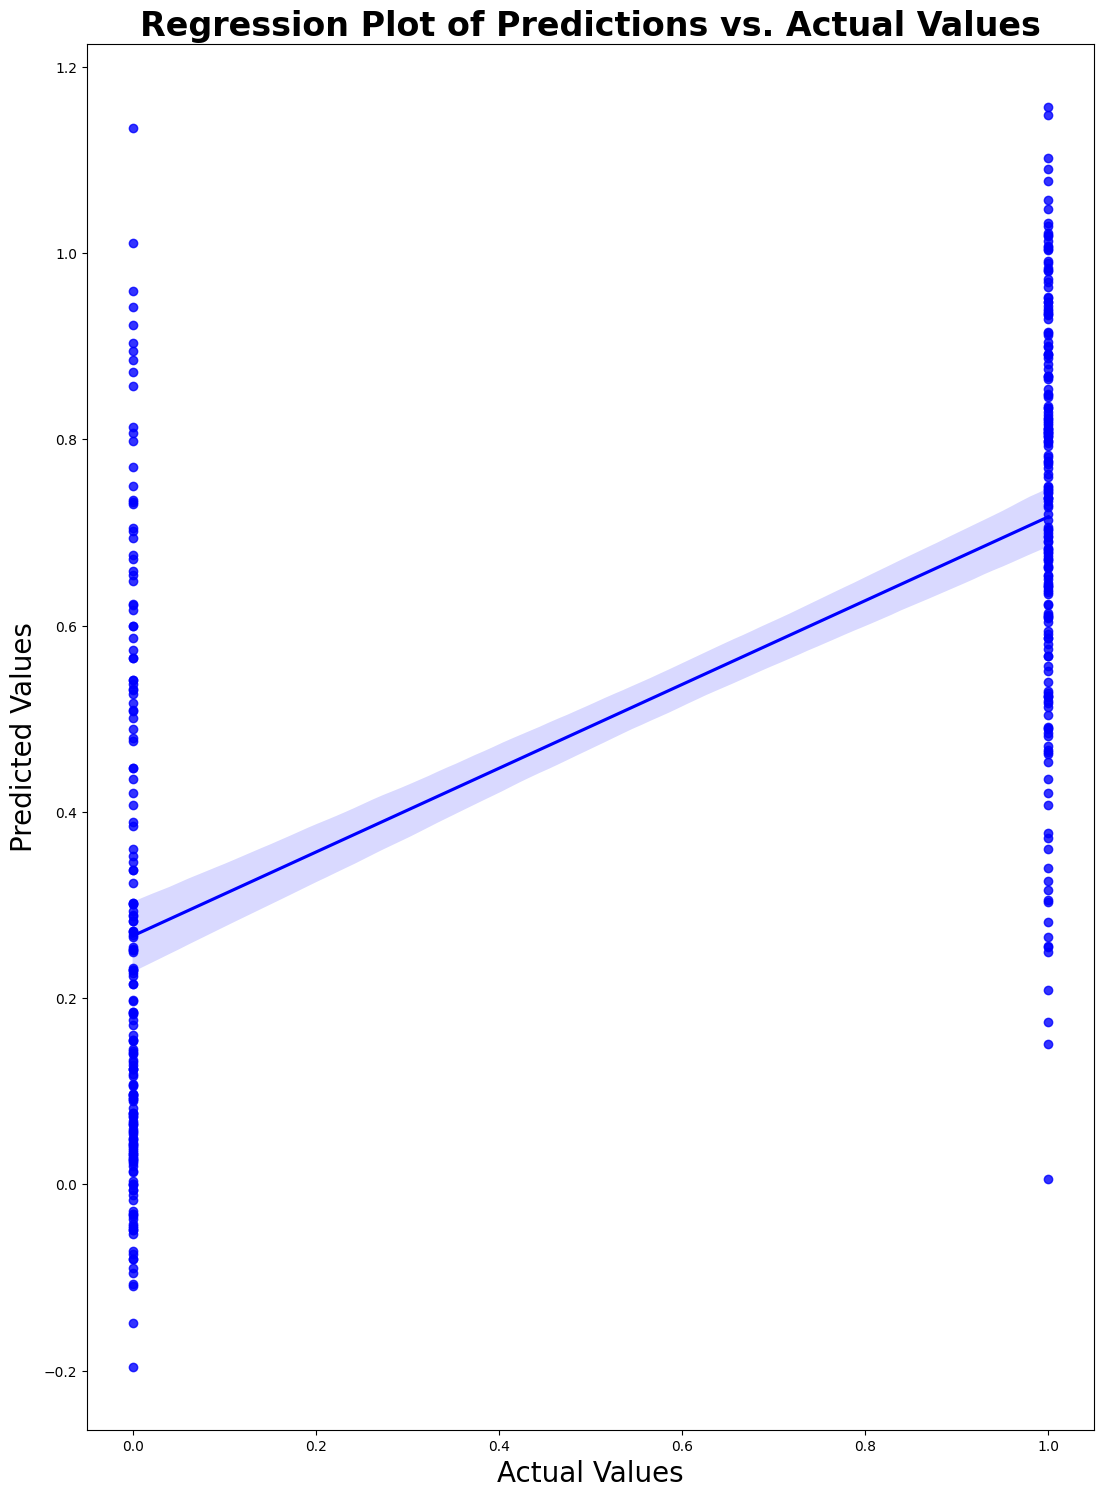

In [155]:
plt.figure(figsize=(13, 18))

# Create the regression plot
sns.regplot(x=y_test, y=predictions, marker='o', color='blue')

# Add title and labels
plt.title('Regression Plot of Predictions vs. Actual Values', fontsize=24, fontweight='bold')
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)

# Show the plot
plt.show()


# Final Results:

In [156]:
print('======== ACCURACY FOR ALL MODELS =========')
print('Logistic Regression:            ',acc_lg)
print('KNeighborsClassifier:           ',acc_kc)
print('Decision Tree:                  ',acc_dt)
print('Random Forest:                  ',acc_rf)
print('Gradient Boosting Classifier:   ',acc_gb)
print('Adaboost Classifier:            ',acc_ad)
print('XGB Classifier:                 ',acc_xgb)
print('SVM:                            ',acc_svm)
print('Ensemble Learning:              ', accuracy_score(y_test, max_vote_final))

======== ACCURACY FOR ALL MODELS =========
Logistic Regression:             0.8037135278514589
KNeighborsClassifier:            0.7347480106100795
Decision Tree:                   0.7214854111405835
Random Forest:                   0.7851458885941645
Gradient Boosting Classifier:    0.8116710875331565
Adaboost Classifier:             0.8010610079575596
XGB Classifier:                  0.7931034482758621
SVM:                             0.7904509283819628
Ensemble Learning:               0.8143236074270557


In [158]:
print('======== F1 SCORE FOR ALL MODELS =========')
print('Logistic Regression:            ', f1_1)
print('KNeighborsClassifier:           ', f1_2)
print('Decision Tree:                  ', f1_3)
print('Random Forest:                  ', f1_4)
print('Gradient Boosting Classifier:   ', f1_5)
print('Adaboost Classifier:            ', f1_6)
print('XGB Classifier:                 ', f1_7)
print('SVM:                            ', f1_8)
print('Ensemble Learning:              ', f1_9)

======== F1 SCORE FOR ALL MODELS =========
Logistic Regression:             0.8082901554404145
KNeighborsClassifier:            0.732620320855615
Decision Tree:                   0.7229551451187335
Random Forest:                   0.7949367088607595
Gradient Boosting Classifier:    0.8193384223918575
Adaboost Classifier:             0.8081841432225064
XGB Classifier:                  0.7958115183246073
SVM:                             0.8049382716049382
Ensemble Learning:               0.8223350253807107


In [160]:
f1_scores = {
    'Logistic Regression': f1_1,
    'KNeighborsClassifier': f1_2,
    'Decision Tree': f1_3,
    'Random Forest': f1_4,
    'Gradient Boosting Classifier': f1_5,
    'Adaboost Classifier': f1_6,
    'XGB Classifier': f1_7,
    'SVM': f1_8,
    'Ensemble Learning': f1_9
}

# Find the highest F1 score and its corresponding model
highest_model = max(f1_scores, key=f1_scores.get)
highest_score = f1_scores[highest_model]

# Print F1 scores with the highest highlighted
print('======== F1 SCORE FOR ALL MODELS =========')
for model, score in f1_scores.items():
    if score == highest_score:
        print(f'{model:40}: \033[1;32m{score:.4f}\033[0m')  # Highlight in green
    else:
        print(f'{model:40}: {score:.4f}')



======== F1 SCORE FOR ALL MODELS =========
Logistic Regression                     : 0.8083
KNeighborsClassifier                    : 0.7326
Decision Tree                           : 0.7230
Random Forest                           : 0.7949
Gradient Boosting Classifier            : 0.8193
Adaboost Classifier                     : 0.8082
XGB Classifier                          : 0.7958
SVM                                     : 0.8049
Ensemble Learning                       : 0.8223


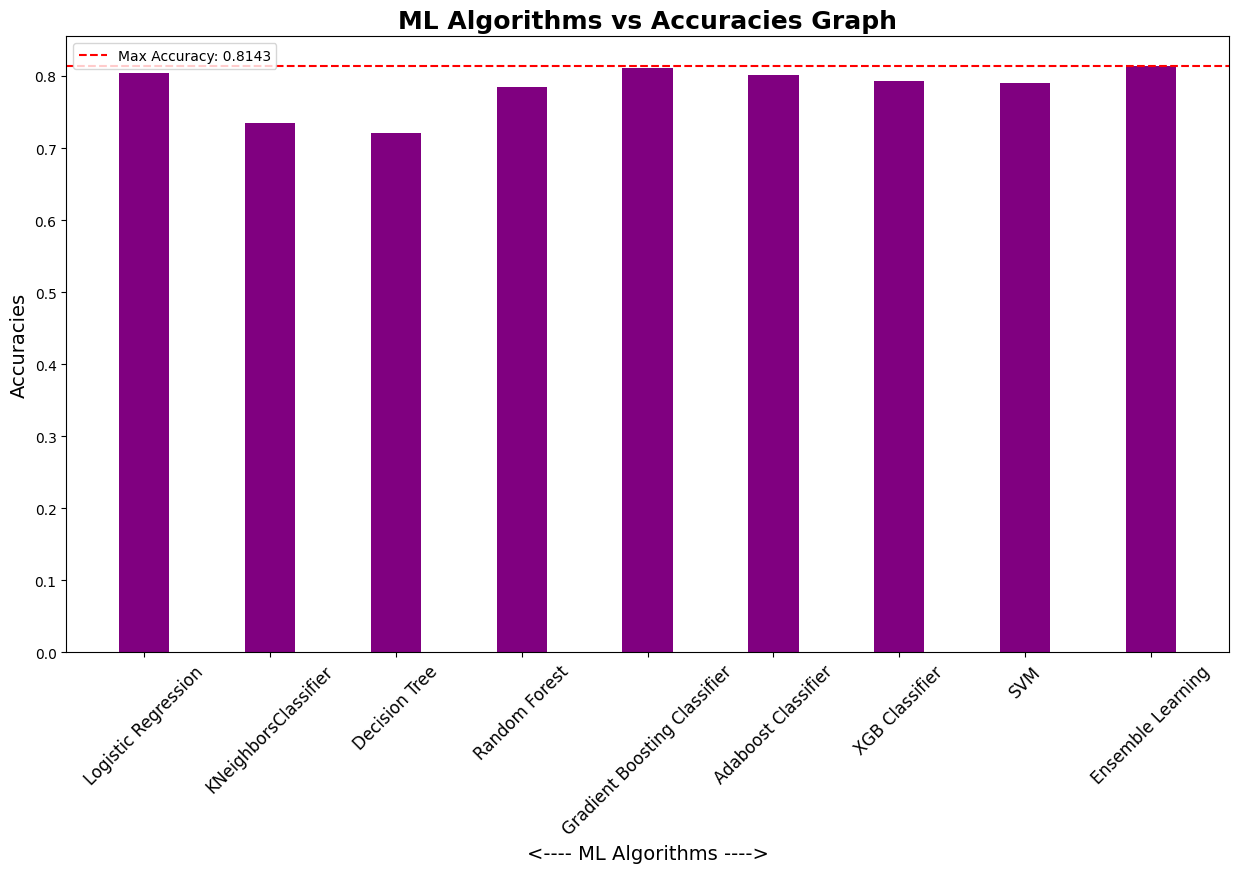

In [168]:
# Assuming the accuracy variables are defined as follows
y_results = [acc_lg, acc_kc, acc_dt, acc_rf, acc_gb, acc_ad, acc_xgb, acc_svm, accuracy_score(y_test, max_vote_final)]

# Find the maximum accuracy and its corresponding index
max_accuracy = max(y_results)

plt.figure(figsize=(15, 8))
plt.bar(x_results, y_results, color='Purple', width=0.4)

# Add a horizontal line for the maximum accuracy
plt.axhline(y=max_accuracy, color='red', linestyle='--', label=f'Max Accuracy: {max_accuracy:.4f}')

plt.title('ML Algorithms vs Accuracies Graph', fontsize=18, fontweight='bold')
plt.xlabel('<---- ML Algorithms ---->', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()  # Show legend for the max line

# Show plot to user
plt.show()


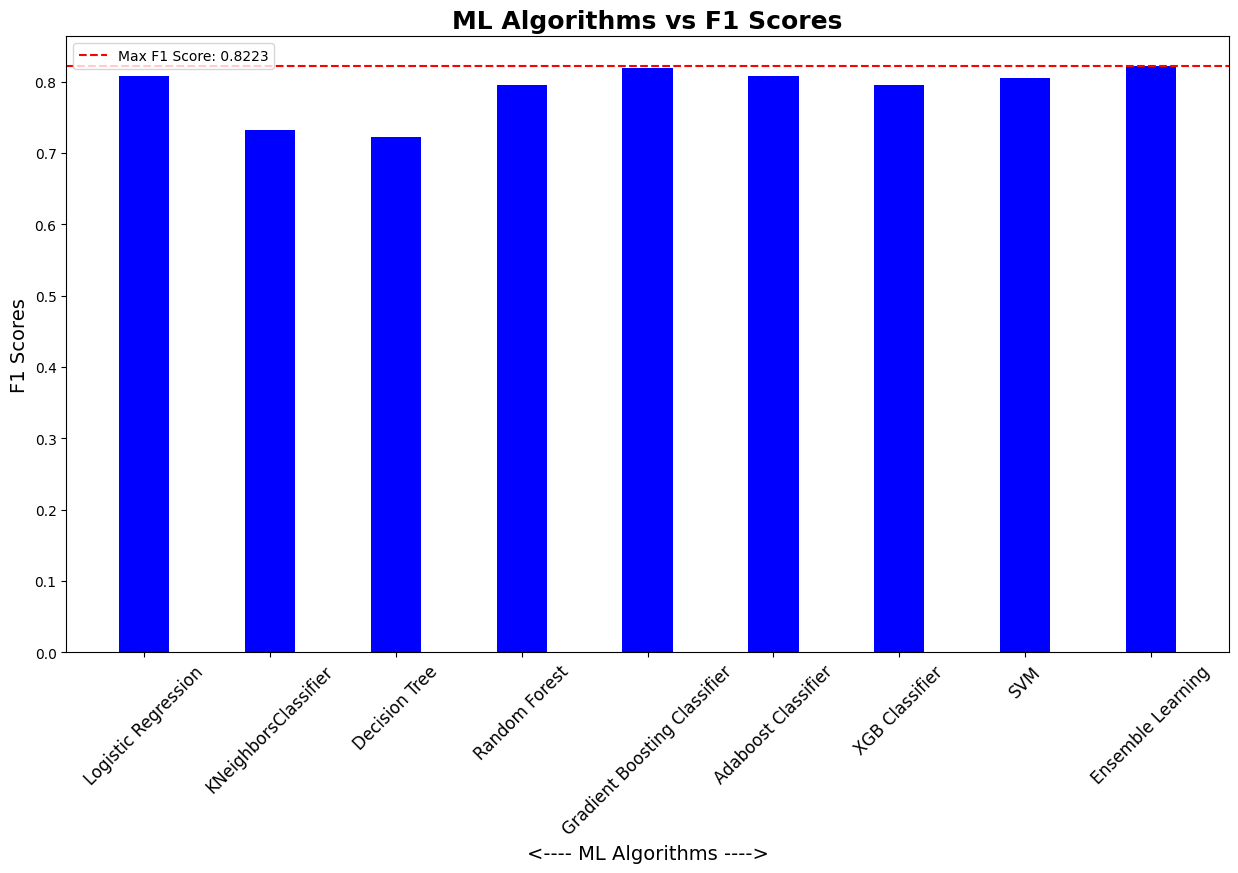

In [167]:
# Assuming the F1 score variables are defined as follows
y_results = [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]

# Find the maximum F1 score and its corresponding index
max_f1 = max(y_results)
max_index = y_results.index(max_f1)

plt.figure(figsize=(15, 8))
plt.bar(x_results, y_results, color='blue', width=0.4)

# Add a horizontal line for the maximum F1 score
plt.axhline(y=max_f1, color='red', linestyle='--', label=f'Max F1 Score: {max_f1:.4f}')

plt.title('ML Algorithms vs F1 Scores', fontsize=18, fontweight='bold')
plt.xlabel('<---- ML Algorithms ---->', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('F1 Scores', fontsize=14)
plt.legend()  # Show legend for the max line

# Show plot to user
plt.show()


# Conclusion:

Hence by evaluating the above models, we can see that "Ensemble Learning" is the best performing model on the given dataset with an F1-score of 82.23% followed by the "Gradient Boosting Classifier" with an F1-score of 81.93%, and also "Logistic Regression", "Adaboost Classifier", and "SVM" are crossing the threshold of 80% F1-score on the given dataset.